In [1]:
# !pip install yfinance
# !pip3 install -U --verbose -e "git+https://github.com/agarwl/google-research.git#egg=neural_additive_models&subdirectory=neural_additive_models" # install a python package from a repo subdirectory
# exit()

## Importing data

In [2]:
# This code installs the yfinance library, which allows you to access financial data from Yahoo Finance
# !pip install yfinance

In [3]:
# Import the yfinance library and assign it to the alias 'yf'
import yfinance as yf

# Create a list of tickers for the stocks you want to retrieve data for
list_tickers = ['CL=F','^GSPC', '^TNX', 'XOM']

# Use the Tickers() function from yfinance to create an object for each ticker in the list
tickers = yf.Tickers(list_tickers)

# Use the download() function from yfinance to download the stock data for the specified date range
data = yf.download(list_tickers,  start="2007-06-01", end="2022-07-01")

# Extract the 'Close' column from the dataframe
data = data['Close']

# Print the dataframe
data


[*********************100%***********************]  4 of 4 completed


,CL=F,XOM,^GSPC,^TNX
Date,,,,
2007-06-01,65.080002,84.220001,1536.339966,4.956
2007-06-04,66.209999,84.220001,1539.180054,4.929
2007-06-05,65.610001,84.260002,1530.949951,4.976
2007-06-06,65.959999,83.620003,1517.380005,4.970
2007-06-07,66.930000,81.959999,1490.719971,5.099
...,...,...,...,...
2022-06-24,107.620003,86.900002,3911.739990,3.125
2022-06-27,109.570000,89.029999,3900.110107,3.194
2022-06-28,111.760002,91.500000,3821.550049,3.206


In [4]:
# Remove all rows with missing values (NaN) from the dataframe
data = data.dropna()

# Check if the dataframe still contains any missing values
# returns False if there is no missing values
data.isnull().values.any()

False

##Statistical analysis 

In [5]:
## Compute the Pearson's correlation coefficient between the columns
corr_matrix = data.corr()
print(corr_matrix)

           CL=F       XOM     ^GSPC      ^TNX
CL=F   1.000000  0.478751 -0.283245  0.445553
XOM    0.478751  1.000000 -0.369685  0.400259
^GSPC -0.283245 -0.369685  1.000000 -0.533662
^TNX   0.445553  0.400259 -0.533662  1.000000


In [6]:
## The spearmanr function returns two values: the Spearman's rank correlation coefficient (corr) and the p-value. The p-value can be used 
## to assess the statistical significance of the correlation. A small p-value (typically less than 0.05) 
## indicates that the correlation is statistically significant, while a large p-value suggests that the correlation may not be meaningful.

from scipy.stats import spearmanr

# Compute the Spearman's rank correlation matrix
corr_matrix = data.corr(method='spearman')

# Extract the column names
column_names = data.columns

# Loop through all pairs of variables
for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        # Extract the columns of interest
        x = data[column_names[i]].values
        y = data[column_names[j]].values
        
        # Compute the Spearman's rank correlation coefficient and p-value
        corr, p_value = spearmanr(x, y)
        
        print(f'Spearman\'s rank correlation coefficient between {column_names[i]} and {column_names[j]}: {corr:.3f}')
        print(f'p-value: {p_value:.3f}')


Spearman's rank correlation coefficient between CL=F and XOM: 0.449
p-value: 0.000
Spearman's rank correlation coefficient between CL=F and ^GSPC: -0.368
p-value: 0.000
Spearman's rank correlation coefficient between CL=F and ^TNX: 0.428
p-value: 0.000
Spearman's rank correlation coefficient between XOM and ^GSPC: -0.162
p-value: 0.000
Spearman's rank correlation coefficient between XOM and ^TNX: 0.229
p-value: 0.000
Spearman's rank correlation coefficient between ^GSPC and ^TNX: -0.555
p-value: 0.000


# Descriptive statistics



In [7]:
# Compute the descriptive statistics
stats = data.describe()

# Print the statistics
print(stats)


              CL=F          XOM        ^GSPC         ^TNX
count  3795.000000  3795.000000  3795.000000  3795.000000
mean     72.404379    77.762809  2140.631904     2.458397
std      23.799346    14.021281   982.681021     0.894163
min     -37.630001    31.450001   676.530029     0.499000
25%      52.174999    70.085003  1337.885010     1.827000
50%      70.800003    81.160004  1979.260010     2.373000
75%      93.020000    87.239998  2747.085083     2.971500
max     145.289993   104.589996  4796.560059     5.248000


In [8]:
# Select specific columns from the dataframe
data = data[['CL=F','^GSPC', '^TNX', 'XOM']]

# Import numpy and train_test_split function from sklearn
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into a training and test set, with a 80/20 split
# test_size = 0.2 means 20% of the data will be used for testing
training_set, test_set = train_test_split(data, test_size=0.2)

# Convert the training and test sets to numpy arrays
training_set = training_set.values
test_set = test_set.values

In [9]:
# Check the shape of the test set
# The output will be the number of rows and columns in the test set
test_set.shape

(759, 4)

In [10]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
sc = StandardScaler()

# Fit the StandardScaler to the training set and transform it
# This centers and scales the data so that the mean is 0 and the standard deviation is 1
training_set_scaled = sc.fit_transform(training_set)

# Apply the same scaling to the test set
test_set_scaled = sc.transform(test_set)

In [11]:
# Create the training set for the independent variables (X_train)
# This is all columns except the last column in the training set (scaled)
X_train = training_set_scaled[:,:-1]

# Create the training set for the dependent variable (y_train)
# This is the last column in the training set (scaled)
y_train = training_set_scaled[:,-1]

# Print the X_train and y_train to check the data
X_train, y_train

(array([[-6.71845016e-01, -6.87405173e-02, -3.15449023e-01],
        [-2.06081423e-03, -1.09917804e+00,  8.93247153e-02],
        [ 2.44767535e+00, -8.91460565e-01,  1.79899043e+00],
        ...,
        [ 6.33397112e-01, -9.08845627e-01,  1.13927640e+00],
        [-2.95509858e-01,  5.26208205e-01,  3.78927838e-01],
        [-9.95434567e-01, -3.02557402e-02, -2.00278674e-01]]),
 array([ 1.13811805, -1.35132987,  0.37400906, ..., -0.39726838,
        -0.04962027,  0.38547758]))

In [12]:
# Create the test set for the independent variables (X_test)
# This is all columns except the last column in the test set (scaled)
X_test = test_set_scaled[:,:-1]

# Create the test set for the dependent variable (y_test)
# This is the last column in the test set (scaled)
y_test = test_set_scaled[:,-1]

In [13]:
X_train.shape

(3036, 3)

MODEL.PY

In [14]:
#@title Imports

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import data_utils
import models as nam_models
import graph_builder
import os.path as osp
import numpy as np

import matplotlib.pyplot as plt

In [15]:
tf.compat.v1.reset_default_graph()
nn_model = graph_builder.create_nam_model(
    x_train=X_train,
    dropout=0.0,
    num_basis_functions=64,
    activation='relu',
    trainable=True,
    shallow=False,
    name_scope='model')

_ = nn_model(X_train[:1])
nn_model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "nam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_nn (FeatureNN)      multiple                  6400      
                                                                 
 feature_nn_1 (FeatureNN)    multiple                  6400      
                                                                 
 feature_nn_2 (FeatureNN)    multiple                  6400      
                                                                 
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
# The optimizer is the algorithm used to update the model's weights
# Adam is a popular choice for neural networks
# The loss function measures how well the model is doing, and the optimizer tries to minimize it
# MeanSquaredError is a common choice for regression problems
# The metrics is used to monitor the training and testing steps. It's useful to have an idea of how well the model is doing
nn_model.compile(optimizer=tf.keras.optimizers.Adam(), 
                    loss= tf.keras.losses.MeanSquaredError(),
                    metrics = tf.keras.metrics.RootMeanSquaredError(),)

In [17]:
nn_model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
95/95 [==============================] - 13s 10ms/step - loss: 0.3582 - root_mean_squared_error: 0.5985
Epoch 2/100
95/95 [==============================] - 1s 9ms/step - loss: 0.1640 - root_mean_squared_error: 0.4050
Epoch 3/100
95/95 [==============================] - 1s 10ms/step - loss: 0.1471 - root_mean_squared_error: 0.3835
Epoch 4/100
95/95 [==============================] - 1s 12ms/step - loss: 0.1377 - root_mean_squared_error: 0.3710
Epoch 5/100
95/95 [==============================] - 1s 10ms/step - loss: 0.1297 - root_mean_squared_error: 0.3602
Epoch 6/100
95/95 [==============================] - 1s 10ms/step - loss: 0.1246 - root_mean_squared_error: 0.3530
Epoch 7/100
95/95 [==============================] - 1s 10ms/step - loss: 0.1170 - root_mean_squared_error: 0.3420
Epoch 8/100
95/95 [==============================] - 1s 11ms/step - loss: 0.1118 - root_mean_squared_error: 0.3344
Epoch 9/100
95/95 [==============================] - 1s 11ms/step - loss: 0.1044

In [18]:
# Evaluate the model on the test set
# This will return the loss and any metrics specified during model compilation
nn_model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 3ms/step - loss: 0.0787 - root_mean_squared_error: 0.2805


[0.0786958709359169, 0.28052783012390137]

In [19]:
# Use the model to make predictions on the test set
predicted_stock_price = nn_model.predict(X_test)
y_pred = predicted_stock_price
# Reshape y_test to have the same shape as the predictions
y_test = np.reshape(y_test, (759,1))

# Print the shape of y_test and the predictions to check they match
print("y_test.shape=",y_test.shape,
      "y_pred.shape=",predicted_stock_price.shape)

24/24 [==============================] - 0s 2ms/step
y_test.shape= (759, 1) y_pred.shape= (759,)


In [20]:
# # Inverse scaling the training and test set
# training_set_original = sc.inverse_transform(training_set_scaled)
# test_set_original = sc.inverse_transform(test_set_scaled)

# # Extracting the independent and dependent variables for the training set
# # X_train contains all columns except the last column
# X_train = training_set_original[:,:-1]
# # y_train contains only the last column
# y_train = training_set_original[:,-1]

# # Extracting the independent and dependent variables for the test set
# # X_test contains all columns except the last column
# X_test = test_set_original[:,:-1]
# # y_test contains only the last column
# y_test = test_set_original[:,-1]

# # Inverse scaling the predicted stock price
# predicted_stock_price = y_pred*sc.scale_[-1]+sc.mean_[-1]

In [21]:
from sklearn import metrics as sk_metrics

def rmse(y_true, y_pred):
  """Root mean squared error between true and predicted values."""
  return float(np.sqrt(sk_metrics.mean_squared_error(y_true, y_pred)))

def mae(y_true, y_pred):
  """Mean Absolute Error between true and predicted values."""
  return float(sk_metrics.mean_absolute_error(y_true, y_pred)) 

def mse(y_true, y_pred):
  """Mean squared error between true and predicted values."""
  return float(sk_metrics.mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
  """R-squared score between true and predicted values."""
  return float(sk_metrics.r2_score(y_true, y_pred)) 

def sigmoid(x):
  """Sigmoid function."""
  if isinstance(x, list):
    x = np.array(x)
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

def calculate_metric(y_true,
                     predictions,
                     regression = True):
  """Calculates the evaluation metric."""
  if regression:
    return r2_score(y_true, predictions)
  else:
    return sk_metrics.roc_auc_score(y_true, sigmoid(predictions))

In [22]:
# Call function that calculates a specific evaluation metric
test_metric = calculate_metric(y_test, predicted_stock_price, regression=True)

# Print the calculated metric
print(test_metric)

0.9249984653313145


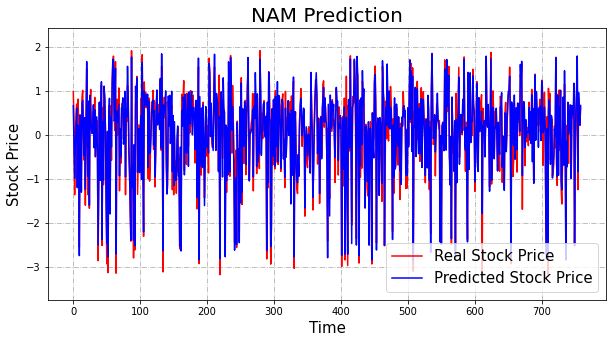

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.grid(visible=True, linestyle='-.')
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('ΝΑΜ Prediction', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend(fontsize=15)
plt.ylim(bottom=min(y_test) - (max(y_test) - min(y_test))*0.1, top=max(y_test) + (max(y_test) - min(y_test))*0.1)
plt.savefig("NAM.png")

plt.show()

In [24]:
import numpy as np
from sklearn.metrics import r2_score

y_pred = predicted_stock_price

# Calculate the baseline performance
baseline_r2 = r2_score(y_test, y_pred)

# Initialize a list to store the feature importance scores
permutation_scores = []

# Iterate over each feature
for feature in range(X_train.shape[1]):
    # Shuffle the values of the current feature
    X_train_shuffled = X_train.copy()
    X_train_shuffled[:, feature] = np.random.permutation(X_train[:, feature])

    # Re-fit the model and make predictions
    nn_model.fit(X_train_shuffled, y_train)
    y_pred_shuffled = nn_model.predict(X_test)

    # Calculate the decrease in performance
    r2 = r2_score(y_test, y_pred_shuffled)
    permutation_score = baseline_r2 - r2
    permutation_scores.append(permutation_score)

# normalize the feature importance to sum to 1
permutation_scores = np.array(permutation_scores)
permutation_scores /= permutation_scores.sum()

24/24 [==============================] - 0s 2ms/step


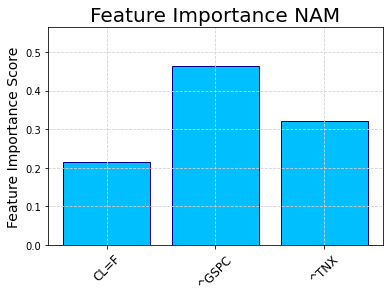

In [30]:
import matplotlib.pyplot as plt

plt.bar(range(X_train.shape[1]), permutation_scores, color='#00BFFF', edgecolor='#00008B')
plt.xticks(range(X_train.shape[1]), data.columns, rotation=45, fontsize=12)
plt.title('Feature Importance NAM', fontsize=20)
plt.ylabel('Feature Importance Score', fontsize=14)
plt.ylim(0, max(permutation_scores)+0.1)
plt.grid(visible=True, linestyle='--', color='#D3D3D3')
plt.savefig('feature_importance NAM.png', bbox_inches='tight')

plt.show()

In [34]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

# Make predictions on the test data
y_pred = predicted_stock_price

# Calculate the feature importance scores
result = permutation_importance(nn_model, X_test, y_pred, scoring = "neg_mean_squared_error")

# to get the feature importance
feature_importance = result.importances_mean

24/24 [==============================] - 0s 3ms/step


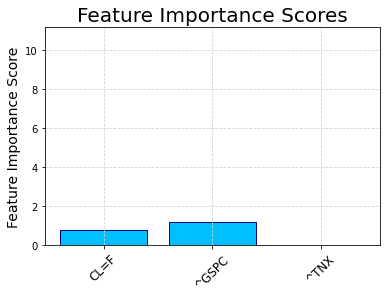

In [35]:
import matplotlib.pyplot as plt


plt.bar(range(len(feature_importance)), feature_importance, color='#00BFFF', edgecolor='#00008B')
plt.xticks(range(len(feature_importance)), data.columns, rotation=45, fontsize=12)
plt.title('Feature Importance Scores', fontsize=20)
plt.ylabel('Feature Importance Score', fontsize=14)
plt.ylim(0, max(feature_importance)+10)
plt.grid(visible=True, linestyle='--', color='#D3D3D3')

plt.show()

In [32]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


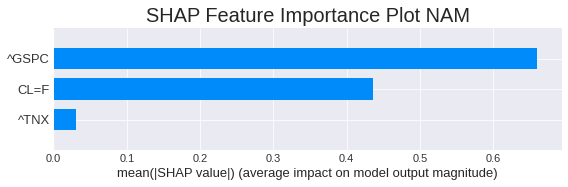

In [60]:
import shap
import matplotlib.pyplot as plt

# Create an explainer object to calculate the SHAP values
explainer = shap.Explainer(nn_model, X_test)
shap_values = explainer(X_test)

# Set the plot style to a more visually appealing style
plt.style.use('seaborn-darkgrid')

# Set the plot title
plt.title('SHAP Feature Importance Plot NAM', fontsize=20)

# Create the bar plot of the feature importances
shap.summary_plot(shap_values, X_test, feature_names=['CL=F','^GSPC', '^TNX'], plot_type='bar')

In [59]:
# # Save the figure to an HTML file
# shap.save_html("SHAP Feature Importance Plot NAM.png", plot = shap.force_plot(shap_values, X_test, feature_names=['CL=F','^GSPC', '^TNX']))